In [1]:
# system
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))

from config.path import get_training_data_path

import cv2
import numpy as np
import matplotlib.pyplot as plt

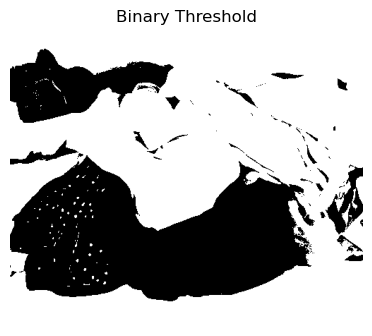

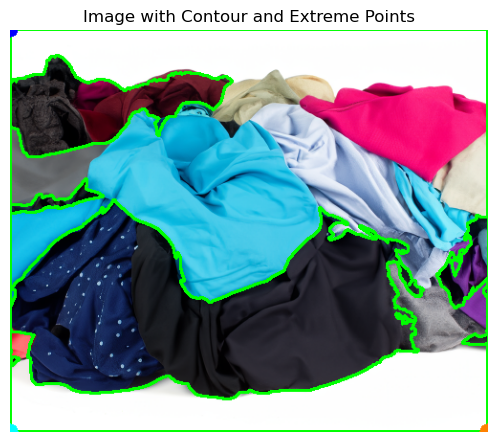

In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_contours_and_extreme_points(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (1, 1), 0)
    _, thresh = cv2.threshold(blurred, 70, 105, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    plt.figure(figsize=(10, 5)) 
    plt.subplot(1, 2, 1)
    plt.imshow(thresh, cmap='gray')
    plt.title('Binary Threshold')
    plt.axis('off')

    # Assume largest contour is our object of interest
    if contours:
        c = max(contours, key=cv2.contourArea)
        # Compute the bounding box of the contour
        x, y, w, h = cv2.boundingRect(c)

        # Draw the contour and bounding box
        cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Calculate extreme points
        leftmost = tuple(c[c[:, :, 0].argmin()][0])
        rightmost = tuple(c[c[:, :, 0].argmax()][0])
        topmost = tuple(c[c[:, :, 1].argmin()][0])
        bottommost = tuple(c[c[:, :, 1].argmax()][0])

        # Draw extreme points
        cv2.circle(image, leftmost, 8, (0, 0, 255), -1) 
        cv2.circle(image, rightmost, 8, (0, 128, 255), -1)
        cv2.circle(image, topmost, 8, (255, 0, 0), -1)
        cv2.circle(image, bottommost, 8, (255, 255, 0), -1)

        plt.figure(figsize=(10, 5)) 
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Image with Contour and Extreme Points')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


#file_name = 'tshirt_0070.jpg'
file_name = 'mixed_0004.png'

img_path = get_training_data_path(file_name)
# Example usage
find_contours_and_extreme_points(img_path)
